In [1]:
#imports to prepare environment

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format


# GSS 2021 SURVEY: 
## <i> CAN PARTICIPANT RESPONSES ACTUALLY SHOW WHAT ZODIAC SIGN A PERSON IS?
    
> Introduction: 
    Since 1972, the General Social Survey (GSS) has been conducted annually in the United States of contemporary American Society--through the lens of adult survey participants.
    
    The GSSurvey asks US adults questions related to current demographics, opinions, religious/spiritual beliefs, political and life view points, social class opinions, as well even recording peoples zodiac signs.
    
    As many viewpoints on astrology overall seem to be changing, oftentimes in terms of self-identity and decision factors, this project is taking a look at astrology/zodiac signs to determine if the responses of the US adult partipants of the GSS actually correlates to the astrological signs they provided. 
    
    

In [2]:
#reading in the GSS 2021 data using stata file
df = pd.read_stata('gss2021.dta')

In [3]:
df.head()

,year,id,wrkstat,wrkslf,wrkgovt,occ10,prestg10,indus10,marital,martype,...,relitennv,biblenv,postlifenv,kidssolnv,uscitznnv,fucitznnv,fepolnv,scibnftsnv,abanyg,fileversion
0,2021,1,working full time,someone else,NaN,receptionists and information clerks,38.00,offices of dentists,married,NaN,...,not very strong,inspired word,no,somewhat worse,NaN,NaN,NaN,2.00,no,"7,221.20"
1,2021,2,working full time,someone else,NaN,advertising and promotions managers,57.00,advertising and related services,divorced,NaN,...,no religion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,221.20"
2,2021,3,working part time,someone else,NaN,miscellaneous assemblers and fabricators,35.00,furniture and home furnishings stores,never married,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,disagree,NaN,yes,"7,221.20"
3,2021,4,working part time,self-employed,NaN,childcare workers,35.00,child day care services,widowed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,221.20"
4,2021,6,working full time,someone else,NaN,insurance claims and policy processing clerks,38.00,insurance carriers and related activities,never married,NaN,...,not very strong,inspired word,yes,NaN,a u.s. citizen,NaN,disagree,NaN,yes,"7,221.20"


### Notes: I went through the survey and found that these will be the columns I am wanting to keep:
> #### Target Variable: ZODIAC

Demographic Variables:
 - born, race, ethnic, age, sex, sexbirth, sexnow, sexornt, hompop, marital, martype

Growing up Variables:
 - paocc10, maocc10, res16, reg16, reli16

Education variables:
- edu, degree, major1, coldeg1

Career Variables:
- hrs1, hrs2, income, wrkslf, indust, satjob, isco08, occ10

Politics Variables:
- partyid, if16who, polviews, gunlaw, grassv

Religious and Spirituality variables:
- relidesc, relig, cofund, postlifev, postlifenv, sprtprsn, relexp, sprtconnct, sprtlrgr, sprtpurp

Life View variables:
- happy, happycohab, life, obey, popular, thnkself, workhard, helpoth, grtwrks, freemind, decevidc, advfmsci

Health variables:
- mditate1, health, hlthphys, hlthmntl, enjoynat, plantrp, eatmeat, recycle, nobuygrn

View of others:
- fairv, fairnv, helpfulv, helpfulnv, trustv, trustnv, conmedic, contv, conpress, consci, conjudge, conmilitary, conlegis

Social variables:
- socbar, socrel, socommun, socfrend, satsoc, class, satfin, quallife, partners, partnrs5


### My analysis is to see if the above survey responses to the questions can actually closely predict what zodiac sign each respondant is. 

I wanted to try this out as I would say that I am moderately unconvinced that Astrology can be a classifier for a person, but I think it would be interesting to test this theory. 

In [4]:
#pulling out only the columns I want to use for this exploration:
df  = df[['zodiac', 'race', 
           'age', 'sex', 'sexornt', 
          'marital', 'res16', 
          'reg16', 'degree',  
          'income', 'wrkslf', 'satjob', 'occ10','partyid', 
          'if16who', 'polviews', 'gunlaw', 'grassv', 'relig', 
          'postlifev', 'postlifenv', 'sprtprsn', 'sprtconnct', 'sprtlrgr', 
          'sprtpurp','happy', 'life', 'obey', 'popular', 'thnkself', 
          'workhard', 'helpoth', 'grtwrks', 'freemind', 'decevidc', 'advfmsci',
         'mditate1', 'health', 'hlthphys', 'hlthmntl', 'enjoynat',  
          'eatmeat', 'recycle', 'nobuygrn','fairv', 'fairnv', 'helpfulv', 
          'helpfulnv', 'trustv', 'trustnv', 'conmedic', 'contv', 'conpress', 
          'consci', 'conjudge', 'conlegis', 'socbar', 
          'socrel', 'socommun', 'socfrend', 'satsoc', 'class', 'satfin', 
          'quallife', 'partners', 'partnrs5'
        ]]

In [5]:
#taking a look
df.head(2)

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,socbar,socrel,socommun,socfrend,satsoc,class,satfin,quallife,partners,partnrs5
0,pisces,white,65.00,female,heterosexual or straight,married,"in a medium-size city (50,000-250,000)",new england,high school,NaN,...,NaN,NaN,NaN,NaN,fair,middle class,more or less satisfied,good,1 partner,1 partner
1,pisces,white,60.00,male,NaN,divorced,"in a large city (over 250,000)",pacific,bachelor's,refused,...,several times a month,several times a year,once or twice a week,several times a month,very good,upper class,pretty well satisfied,excellent,NaN,NaN


In [6]:
#finding the size of data left

df.shape

(4032, 66)

In [7]:
#wonder what dtypes I will be working with:
df.dtypes

zodiac      category
race        category
age         category
sex         category
sexornt     category
              ...   
class       category
satfin      category
quallife    category
partners    category
partnrs5    category
Length: 66, dtype: object

In [8]:
#count of the target variable
df.zodiac.value_counts()

capricorn      390
scorpio        346
sagittarius    339
aquarius       330
virgo          327
libra          319
leo            305
taurus         281
pisces         279
cancer         270
gemini         253
aries          237
Name: zodiac, dtype: int64

In [9]:
#finding nulls in target variable...
df.zodiac.isnull().sum()
#respondants possibly not knowing, or caring..might be a good way to test?

356

In [10]:
#finding nulls in other columns...
df.isnull().sum()

zodiac       356
race          54
age          333
sex           92
sexornt     1772
            ... 
class         14
satfin        16
quallife     400
partners    1719
partnrs5    1718
Length: 66, dtype: int64

In [11]:
#checking out the possible 'why' of nulls..
df.partnrs5.value_counts()
#possibly due to respondants not wanting to say....

1 partner                   1416
no partners                  336
2 partners                   151
5-10 partners                109
3 partners                    83
1 or more, (unspecified)      83
4 partners                    64
11-20 partners                40
21-100 partners               25
more than 100 partners         7
Name: partnrs5, dtype: int64

In [12]:
df.quallife.value_counts()

very good    1449
good         1243
excellent     477
fair          399
poor           64
Name: quallife, dtype: int64

In [13]:
#### Dropping columns:

### TAKEAWAY: I was considering possibly filling out 'unsure' and 'no response' for certain nulls, but I may just take them out by percentage basis as each nulled column is different and probably for different reasons

In [14]:
#First, I will just drop the nulls in the target variable column, as these won't help determine classifying the target
df = df.dropna(axis=0, subset=['zodiac'])
df.zodiac.isnull().sum()

0

In [15]:
#Because the partners and partnrs5 columns are missing 1/3 of their responses, and could be possibly due to age/demographic, I will fill these with 'no_response'
#df.partners = df.partners.fillna('no_response')
#ok. I need to set a category up for these columns as this code came out with a Categorical Error

In [16]:
df.partners.value_counts()

1 partner                   1427
no partners                  560
2 partners                    82
3 partners                    42
5-10 partners                 40
4 partners                    27
1 or more, (unspecified)       5
11-20 partners                 4
more than 100 partners         4
21-100 partners                2
Name: partners, dtype: int64

In [17]:
df.partners.dtypes

CategoricalDtype(categories=['no partners', '1 partner', '2 partners', '3 partners',
                  '4 partners', '5-10 partners', '11-20 partners',
                  '21-100 partners', 'more than 100 partners',
                  '1 or more, (unspecified)'],
, ordered=True)

In [18]:
#changing the dtype to an object so that I can fill the nulls
def partner_type(df):
    df['partners'] = df['partners'].astype(object)
    df['partners'] = df['partners'].fillna('no response')
    return df

In [19]:
#filling nulls
df= partner_type(df)

In [20]:
#same thing for partnrs5
def partner_five(df):
    df['partnrs5'] = df['partnrs5'].astype(object)
    df['partnrs5'] = df['partnrs5'].fillna('no response')
    return df

In [21]:
df = partner_five(df)
df.head()

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,socbar,socrel,socommun,socfrend,satsoc,class,satfin,quallife,partners,partnrs5
0,pisces,white,65.00,female,heterosexual or straight,married,"in a medium-size city (50,000-250,000)",new england,high school,NaN,...,NaN,NaN,NaN,NaN,fair,middle class,more or less satisfied,good,1 partner,1 partner
1,pisces,white,60.00,male,NaN,divorced,"in a large city (over 250,000)",pacific,bachelor's,refused,...,several times a month,several times a year,once or twice a week,several times a month,very good,upper class,pretty well satisfied,excellent,no response,no response
5,aries,black,33.00,female,NaN,never married,"in a small city or town (under 50,000)",new england,bachelor's,NaN,...,about once a month,about once a month,about once a month,about once a month,good,middle class,pretty well satisfied,good,no response,no response
6,scorpio,white,20.00,male,heterosexual or straight,never married,"in a medium-size city (50,000-250,000)",middle atlantic,high school,"$25,000 or more",...,never,almost daily,once or twice a week,about once a month,good,middle class,not satisfied at all,very good,1 partner,1 partner
8,pisces,white,76.00,male,heterosexual or straight,married,"in a large city (over 250,000)",middle atlantic,high school,"$25,000 or more",...,about once a year,about once a year,about once a month,about once a month,good,working class,not satisfied at all,good,1 partner,1 partner


In [22]:
df.partners.dtype

dtype('O')

In [23]:
df.age.dtype

CategoricalDtype(categories=[         18.0,          19.0,          20.0,          21.0,
                           22.0,          23.0,          24.0,          25.0,
                           26.0,          27.0,          28.0,          29.0,
                           30.0,          31.0,          32.0,          33.0,
                           34.0,          35.0,          36.0,          37.0,
                           38.0,          39.0,          40.0,          41.0,
                           42.0,          43.0,          44.0,          45.0,
                           46.0,          47.0,          48.0,          49.0,
                           50.0,          51.0,          52.0,          53.0,
                           54.0,          55.0,          56.0,          57.0,
                           58.0,          59.0,          60.0,          61.0,
                           62.0,          63.0,          64.0,          65.0,
                           66.0,          67.0,      

I want to change the age dtype to float, instead of object. First I need to changed the string values:

In [24]:
df.age.value_counts()

67.0    87
33.0    82
59.0    81
57.0    79
42.0    77
        ..
19.0    14
86.0    14
87.0     5
88.0     5
18.0     4
Name: age, Length: 72, dtype: int64

In [25]:
np.where(df.age == "'89 or older'", '80.00', df.age)

array([65.0, 60.0, 33.0, ..., 29.0, 68.0, 48.0], dtype=object)

In [26]:
#changeing unknown to mean:
np.where(df.age == 'unknown', df.age.mean, df.age)

array([65.0, 60.0, 33.0, ..., 29.0, 68.0, 48.0], dtype=object)

#### I know I want to use age within my charts and to also bin.
When trying to wrangle this age column, I found I needed to fix and target one age variable that was oddly formatted. 
Even having used '89 or older' wasn't suffice and I got some help on sorting out that I needed to target the len of the age.str, find a column that had this age variable by using [0], and change it to match as 89.0. 

In [27]:
#creating a function to put df through:
def age_change(df):
    df.age = np.where(df.age == df[df.age.str.len()>5].age.values[0], '89.0', df.age)
    df.age = np.where(df.age == 'unknown', df.age.mean, df.age)
    return df

In [28]:
df = age_change(df)

In [29]:
#seeing if there are any nulls
df.age.isnull().sum()

29

In [30]:
#dropping nulls
df = df.dropna(axis=0, subset=['age'])
df.age.isnull().sum()

0

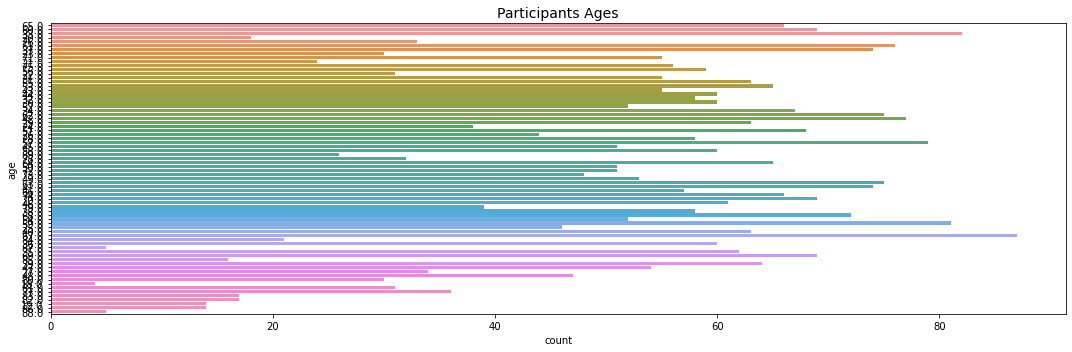

In [31]:
plt.figure(figsize = (15,  5))
sns.countplot(data = df, y = 'age')
plt.title(f"Participants Ages", fontsize = 14)
plt.tight_layout()
plt.show()

In [32]:
df.age.value_counts().index

Index([  67.0,   33.0,   59.0,   57.0,   42.0,   61.0,   63.0,   62.0,   41.0,
         37.0,   68.0,   70.0,   69.0,   60.0,   51.0,   34.0,   65.0,   74.0,
         64.0,   53.0,   39.0,   40.0,   55.0,   29.0,   35.0,   46.0,   58.0,
         44.0,   36.0,   30.0,   56.0,   28.0,   32.0,   38.0,   66.0,   75.0,
         31.0,   43.0,   71.0,   47.0,   49.0,   54.0,   52.0,   72.0,   50.0,
         45.0,   73.0,   48.0,   25.0,   26.0,   79.0,   24.0,   77.0,   27.0,
         76.0,   78.0,   81.0,   22.0,   23.0,   80.0, '89.0',   21.0,   84.0,
         20.0,   83.0,   82.0,   85.0,   19.0,   86.0,   87.0,   88.0,   18.0],
      dtype='object')

This was the code used to find and target one row that held that odd '89 or older'
#df[df.age.str.len()>5].age.values[0]

___________________________________________

#### Checking out dtypes:

In [33]:
df.dtypes

zodiac      category
race        category
age           object
sex         category
sexornt     category
              ...   
class       category
satfin      category
quallife    category
partners      object
partnrs5      object
Length: 66, dtype: object

In [34]:
#changing all the dtypes to objects so easier to handle for now
df = df.astype(object)

In [35]:
#turning age to floats. This is added in correct order in wrangle.py file
df.age.astype(float)

0                     65.00
1                     60.00
5                     33.00
6                     20.00
8                     76.00
               ...         
4026                  31.00
4027                  21.00
4028                  29.00
4030                  68.00
4031                  48.00
Name: age, Length: 3647, dtype: float64

In [36]:
df.dtypes

zodiac      object
race        object
age         object
sex         object
sexornt     object
             ...  
class       object
satfin      object
quallife    object
partners    object
partnrs5    object
Length: 66, dtype: object

In [39]:
df.shape

(3647, 66)

In [40]:
df.sexornt.value_counts()

heterosexual or straight       1955
bisexual                         95
gay, lesbian, or homosexual      74
Name: sexornt, dtype: int64

In [41]:
df.isnull().sum()

zodiac         0
race          47
age            0
sex           12
sexornt     1523
            ... 
class          7
satfin        11
quallife     253
partners       0
partnrs5       0
Length: 66, dtype: int64

In [42]:
#the rest of nulls will become unknowns...
df=df.fillna('unknown')

In [43]:
df.isnull().sum()

zodiac      0
race        0
age         0
sex         0
sexornt     0
           ..
class       0
satfin      0
quallife    0
partners    0
partnrs5    0
Length: 66, dtype: int64

### NOTES: dtypes and Nulls are done! ✅ Let's Split...

_______________________________________________

## Splitting Data into Train, Validate, Test:

In [44]:
#split the data into train and test
def split(df):
    train_and_validate, test = train_test_split(df, random_state=13, test_size=.15)
    train, validate = train_test_split(train_and_validate, random_state=13, test_size=.2)

    print('Train: %d rows, %d cols' % train.shape)
    print('Validate: %d rows, %d cols' % validate.shape)
    print('Test: %d rows, %d cols' % test.shape)

    return train, validate, test

In [45]:
train, validate, test = split(df)

Train: 2479 rows, 66 cols
Validate: 620 rows, 66 cols
Test: 548 rows, 66 cols


In [46]:
train.head()

,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,socbar,socrel,socommun,socfrend,satsoc,class,satfin,quallife,partners,partnrs5
634,libra,other,59.00,female,heterosexual or straight,married,"in a large city (over 250,000)",pacific,bachelor's,"$25,000 or more",...,never,almost daily,never,once or twice a week,good,working class,pretty well satisfied,very good,1 partner,1 partner
1516,sagittarius,white,49.00,female,unknown,never married,"in a medium-size city (50,000-250,000)",east north central,high school,"$10,000 to $14,999",...,never,several times a year,never,about once a month,good,working class,more or less satisfied,good,no response,no response
2383,capricorn,white,62.00,female,heterosexual or straight,married,in a suburb near a large city,east north central,bachelor's,refused,...,unknown,unknown,unknown,unknown,good,middle class,pretty well satisfied,very good,1 partner,1 partner
632,pisces,other,29.00,male,unknown,married,"in a large city (over 250,000)",west south central,associate/junior college,"$15,000 to $19,999",...,several times a year,several times a month,never,about once a year,very good,lower class,not satisfied at all,excellent,no response,no response
1393,capricorn,white,86.00,male,heterosexual or straight,married,in open country but not on a farm,east north central,graduate,"$25,000 or more",...,never,about once a month,about once a month,about once a month,very good,upper class,pretty well satisfied,very good,no partners,no partners


In [47]:
#looking at zodiac count (in order) by function:
def zodiac_order(df):
    print('Aries:',(df['zodiac']== 'aries').sum())
    print('Taurus:',(df['zodiac']== 'taurus').sum())
    print('Gemini:',(df['zodiac']== 'gemini').sum())
    print('Cancer:',(df['zodiac']== 'cancer').sum())
    print('Leo:',(df['zodiac']== 'leo').sum())
    print('Virgo:',(df['zodiac']== 'virgo').sum())
    print('Libra:',(df['zodiac']== 'libra').sum())
    print('Scorpio:',(df['zodiac']== 'scorpio').sum())
    print('Sagittarius:',(df['zodiac']== 'sagittarius').sum())
    print('Capricorn:',(df['zodiac']== 'capricorn').sum())
    print('Aquarius:',(df['zodiac']== 'aquarius').sum())
    print('Pisces:',(df['zodiac']== 'pisces').sum())
    return df

In [48]:
zodiac_order(train)

Aries: 165
Taurus: 192
Gemini: 159
Cancer: 170
Leo: 209
Virgo: 220
Libra: 217
Scorpio: 232
Sagittarius: 231
Capricorn: 269
Aquarius: 223
Pisces: 192


,zodiac,race,age,sex,sexornt,marital,res16,reg16,degree,income,...,socbar,socrel,socommun,socfrend,satsoc,class,satfin,quallife,partners,partnrs5
634,libra,other,59.00,female,heterosexual or straight,married,"in a large city (over 250,000)",pacific,bachelor's,"$25,000 or more",...,never,almost daily,never,once or twice a week,good,working class,pretty well satisfied,very good,1 partner,1 partner
1516,sagittarius,white,49.00,female,unknown,never married,"in a medium-size city (50,000-250,000)",east north central,high school,"$10,000 to $14,999",...,never,several times a year,never,about once a month,good,working class,more or less satisfied,good,no response,no response
2383,capricorn,white,62.00,female,heterosexual or straight,married,in a suburb near a large city,east north central,bachelor's,refused,...,unknown,unknown,unknown,unknown,good,middle class,pretty well satisfied,very good,1 partner,1 partner
632,pisces,other,29.00,male,unknown,married,"in a large city (over 250,000)",west south central,associate/junior college,"$15,000 to $19,999",...,several times a year,several times a month,never,about once a year,very good,lower class,not satisfied at all,excellent,no response,no response
1393,capricorn,white,86.00,male,heterosexual or straight,married,in open country but not on a farm,east north central,graduate,"$25,000 or more",...,never,about once a month,about once a month,about once a month,very good,upper class,pretty well satisfied,very good,no partners,no partners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,taurus,other,19.00,male,heterosexual or straight,never married,in a suburb near a large city,south atlantic,high school,"$25,000 or more",...,unknown,unknown,unknown,unknown,very good,working class,not satisfied at all,fair,no partners,no partners
1194,taurus,white,46.00,male,heterosexual or straight,married,"in a medium-size city (50,000-250,000)",south atlantic,high school,"$25,000 or more",...,several times a year,about once a month,never,about once a year,good,working class,more or less satisfied,good,1 partner,1 partner
1937,sagittarius,white,63.00,male,heterosexual or straight,married,"in a medium-size city (50,000-250,000)",middle atlantic,graduate,refused,...,never,several times a month,several times a month,several times a month,very good,middle class,pretty well satisfied,very good,1 partner,1 partner
1513,leo,white,28.00,unknown,unknown,never married,"in a small city or town (under 50,000)",east north central,graduate,"$20,000 to $24,999",...,never,about once a month,never,never,fair,middle class,more or less satisfied,fair,no response,no response
